# 목적
    - Tensorflow 상에서 기본적인 Linear Regression을 구현한다.
    - Hypothesis,Cost Function, Learning Rate, Gradient Descent에 대한 의미를 이해한다.
    - Gradient Descent에 필요한 Tensorflow 함수의 사용법을 익힌다.
    
    

## Linear Regression이란?

- Regression(회귀) : 회귀란, 어떤 실수값을 예측하는 문제.(ex 주식 가격 예측 등)
- Classification(분류) : 예측하는 값이 실수값이 아닌 이산값(Descrite Value)인 문제. (ex 0-9사이의 숫자 이미지 분류)
- Linear Regression은 선형함수를 이용해서 회귀를 수행하는 기법. 

- 모든 머신러닝 모델은 다음이 3가지 과정을 거친다.
    - 학습하고자 하는 가설(Hypothesis)h(x)을 수학적 표현식으로 나타낸다.
        - 선형회귀는 학습하고자 하는 가설h(x)을 선형 함수형태로 표현한다. 
        - y=xW+b (x,y는 input,output dat; W,b 는 parameter 이며 학습을 통해 적절한 값을 찾아내야 한다.

    - 가설의 성능을 측정할 수 있는 손실함수(loss function)J(x)을 정의한다.
        - 적합한 parameter값을 알아내기 위해 현재 파라미터 값이 우리가 풀고자 하는 목적(Tesk)에 적합한 값인지를 측정하기 위해 손실함수를 정의한다.
        - 가장 대표적인 손실함수를 MSE(Mean of Squared Error, 편균제곱오차)dlek.
        - MSE = (1/2n) X SUM((y^-y)^2) : 예측값과 실제 값의 차이를 제곱해서 모두 더한 후 평균을 취하는 함수.--> 예측이 정확할수록 작은 값을 갖는다.

    - 손실함수J(x)을 최소화 할 수 있는 학습 알고리즘을 설계한다.
        - 처음엔 랜덤한 닶으로 파라미터를 초기화한 후에 적절한 값으로 업데이트함.
        - 파라미터를 업데이트 하는 알고리즘을 최적화 기법이다로 한다.(Optimization)
        - 대표정인 기법은 경사하강법(Gradient Descent) : 다양한 기법(Newton's Method,Genetic Algorithm등)이 있지만 단순하면서도 좋은 성능을 보이는 경사하강법이 딥러닝 기법의 주요 알고리즘임.
        - 경사하강법 : 현재  step의 parameter에서 손실 함수의 미분값에 learning_rate를 곱한만큼 빼서 다음 step의 parameter값으로 저장함.
        - 손실함수의 미분값이 작으면 적게 업데이트가 되고 크면 많이 업데이트가 됨.
        
        
        

In [3]:
#Lab 2-1 Linear Regression(variable input)
#변수만 사요하여 Gradient Descent 구현

import tensorflow as tf

#Set seed for reproduccibility
#tf.random.set_seed(0)

X_train=[1,2,3]
Y_train=[1,2,3]

#Try to find values W(Weignts) and b(bias) to compute Y_data=X_data*W+b
#We know that W and b should be 1 and 0
#But let the algorithm figure it out
W=tf.Variable(tf.random.normal([1]),name='weight')
b=tf.Variable(tf.random.normal([1]),name='bias')

#Set Hypothesis = X_train*W+b
hypothesis=X_train*W+b

#Set cost/loss Function
cost=tf.reduce_mean(tf.square(hypothesis-Y_train))

#Set optimizer for minimize (Algorithm : GradientDescent.minimize)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

#Launch thr graph in a session
#In the TF1,Graph is launched by using session.run()
sess=tf.Session()

#Initialize Variables in the graph
sess.run(tf.global_variables_initializer())

#sess.run(tf.global_variables_initializer())
#sess.run(tf.compat.v1.global_variables_initializer)
#Fit the line
for step in range(2001):
    sess.run(train)
    if step%20==0:
        print(step,sess.run(cost),sess.run(W))

0 2.7540505 [0.21830237]
20 0.037729617 [0.80688834]
40 0.0119304145 [0.8685105]
60 0.0106328605 [0.87969357]
80 0.009655099 [0.8858239]
100 0.00876889 [0.8912352]
120 0.007964051 [0.896351]
140 0.0072330814 [0.9012225]
160 0.0065692016 [0.9058647]
180 0.005966255 [0.91028875]
200 0.005418644 [0.9145048]
220 0.0049213073 [0.9185228]
240 0.0044696038 [0.9223519]
260 0.0040593725 [0.9260011]
280 0.0036867864 [0.9294788]
300 0.0033484015 [0.932793]
320 0.0030410655 [0.9359515]
340 0.0027619398 [0.9389616]
360 0.002508438 [0.94183016]
380 0.0022782076 [0.9445639]
400 0.002069107 [0.9471692]
420 0.001879196 [0.94965196]
440 0.0017067186 [0.9520182]
460 0.0015500645 [0.9542732]
480 0.0014077951 [0.9564222]
500 0.0012785825 [0.9584701]
520 0.0011612299 [0.9604219]
540 0.0010546441 [0.962282]
560 0.00095784647 [0.9640545]
580 0.0008699308 [0.96574384]
600 0.0007900866 [0.96735376]
620 0.000717568 [0.968888]
640 0.0006517098 [0.9703502]
660 0.0005918926 [0.9717436]
680 0.00053756445 [0.9730716]

# 응용 설명
    - 선형회귀의 개념을 다시 한번 설명한다.
        : Linear Regression 이란, 주어진 Data(x_data)의 결과값인y_data의 관계를 선형적인 관계로 보고, 예측함수(가설=Hypothesis)를 선형함수를 사용하는 것.
        
    - 계산이 아닌 반복을 통하여 정답에 가까워지는 것을 설명한다.
 # Graph : Data-> (x Weight) -> (+ Bias)---hypothesis--(Cost Function)--Cost-->(Minimize)-->(Train)
        Data에 W(Weight)를 곱하고 b(bias)를 더하여 가설(hypothesis)을 세운다. 이를 cost function(이 실습에서는 실제 y값과 hypothesis의 차 의 제곱)을 구하고 Minimize 알고리즘으로 GradientDescent를 사용하여 Train 시킨다.   
        GradientDescent는 cost의 미분 값이 0와 가까워 지는 W와 b의 반복 계산을 통해 최적화 시키는 알고리즘이다.

        
                
    - 실행 결과 값을 설명한다. 처음의 W와 b값 그리고 cost값의 변동 추이를본다.
    - 이를 그래프로 표시할 수 있는지 확인한다.
    - learning rate를 달리 주었을 때 반응을 본다.
    


]
946 1.412559e-10 [5.00001] [9.99997]
948 1.412559e-10 [5.00001] [9.99997]
950 1.412559e-10 [5.00001] [9.99997]
952 1.412559e-10 [5.00001] [9.99997]
954 1.412559e-10 [5.00001] [9.99997]
956 1.412559e-10 [5.00001] [9.99997]
958 1.412559e-10 [5.00001] [9.99997]
960 1.412559e-10 [5.00001] [9.99997]
962 1.412559e-10 [5.00001] [9.99997]
964 1.412559e-10 [5.00001] [9.99997]
966 1.412559e-10 [5.00001] [9.99997]
968 1.412559e-10 [5.00001] [9.99997]
970 1.412559e-10 [5.00001] [9.99997]
972 1.412559e-10 [5.00001] [9.99997]
974 1.412559e-10 [5.00001] [9.99997]
976 1.412559e-10 [5.00001] [9.99997]
978 1.412559e-10 [5.00001] [9.99997]
980 1.412559e-10 [5.00001] [9.99997]
982 1.412559e-10 [5.00001] [9.99997]
984 1.412559e-10 [5.00001] [9.99997]
986 1.412559e-10 [5.00001] [9.99997]
988 1.412559e-10 [5.00001] [9.99997]
990 1.412559e-10 [5.00001] [9.99997]
992 1.412559e-10 [5.00001] [9.99997]
994 1.412559e-10 [5.00001] [9.99997]
996 1.412559e-10 [5.00001] [9.99997]
998 1.412559e-10 [5.00001] [9.99997]

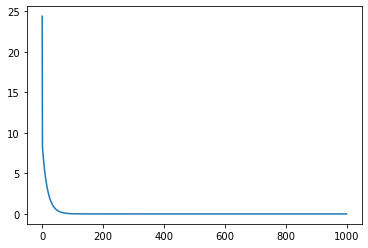

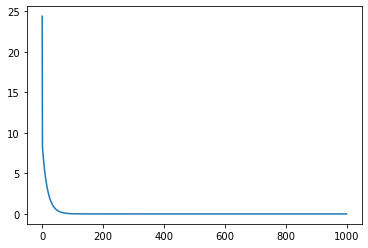

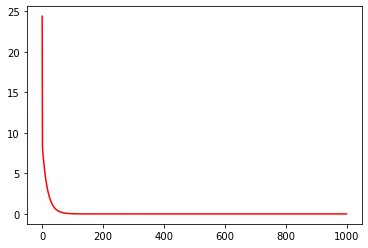

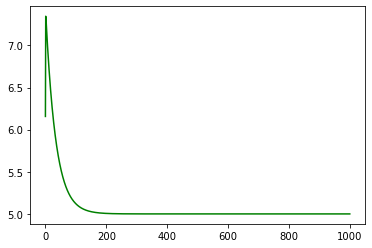

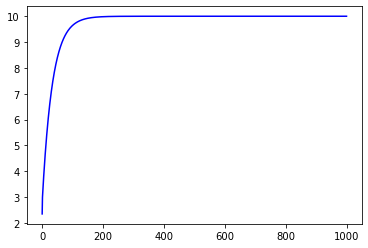

In [22]:
# 실행 결과값을 Graph를 표시하여 추이를 본다.2.1_linear_regression_TF1.ipynb

import tensorflow as tf
import matplotlib.pyplot as plt

tf.set_random_seed(777) #for reproducibility
x_train=[1,2,3,4]
y_train=[5*i+10 for i in x_train] #The function with x_train is 5*x_train + 10 

#Set for save cost, W, b to graph
cost_val=[]
W_val=[]
b_val=[]

#Try to find values for W and b to compute y_data=x_data*W +b
#We know that W should be 5 ans b 10 but let Tensorflow figure in out
W=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

#Set hypothesis XW+b
hypothesis=x_train*W+b

#cost function / loss function
cost=tf.reduce_mean(tf.square(hypothesis-y_train))

#Minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05)
train=optimizer.minimize(cost)

#Launch the graph in a session
sess=tf.Session()
#Initializes global variables in the gtaph
sess.run(tf.global_variables_initializer())

#Fit thr line

for step in range(2000):
    sess.run(train)
    if step%2==0:
        print(step,sess.run(cost),sess.run(W),sess.run(b))
        current_cost=sess.run(cost)
        cost_val.append(current_cost)
        current_W=sess.run(W)
        W_val.append(current_W)
        current_b=sess.run(b)
        b_val.append(current_b)

plt.plot(range(len(cost_val)),cost_val) #reward 그래프
plt.show()
plt.plot(cost_val)
plt.show()

plt.plot(cost_val,'r')
plt.show()
plt.plot(W_val,'g')
plt.show()
plt.plot(b_val,'b')
plt.show()






- 실행 결과 값을 설명한다. 처음의 W와 b값 그리고 cost값의 변동 추이를본다.

    : 처음의 W와 b , cost 는 random value로 설정이 되면서 Gradient Descent를 통해 값이 계속적으로 업데이트 되면서 처음 설정한 w=5,b=10 으로, cost는 0에 수렴함을 보인다.

- 이를 그래프로 표시할 수 있는지 확인한다.

- learning rate를 달리 주었을 때 반응을 본다.
    : learning rate를 0.01 또는 0.1로 설정했을 때, learning 속도가  0.00001 정도로 닥게 설정했을 때보다 빠르고, 더 정확하게 예측함을 보이다. learning rate를 0.0001 이하로 매우 낮게 설정했을 때, learning 속도가 매우 낮고, 예측 정확도의 오차 또한 큰것을 발견함. 즉, learning rate가 작아도  정확도가 커지는 것은 아님.